<a href="https://colab.research.google.com/github/sofiaborgato/Bioinformatic_project/blob/main/Machine_Learning_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import tarfile

In [ ]:
!git clone 'https://github.com/sofiaborgato/Bioinformatic_project.git'

Cloning into 'Bioinformatic_project'...
remote: Enumerating objects: 199, done.
remote: Counting objects: 100% (199/199), done.
remote: Compressing objects: 100% (193/193), done.
remote: Total 199 (delta 88), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (199/199), 9.38 MiB | 2.52 MiB/s, done.
Resolving deltas: 100% (88/88), done.


In [ ]:
cd Bioinformatic_project/

/content/Bioinformatic_project


In [ ]:

# open file
file = tarfile.open('./data_local_concat.tar.xz') 
# extracting file
file.extractall('./')
  
# file.close()
# path='./Bioinformatic_project'
# for file_name in os.listdir(path):
#   print(file_name)


In [ ]:
data=pd.read_csv('/content/Bioinformatic_project/data_local_concat/stats.csv')

# Data Exploration


In [ ]:
#compute the number of null object for each column
palette = sns.color_palette("Paired")
cmap = ListedColormap(['white','lightcoral'])
def nullscan(df_check):
    df_nulls = (df_check == 0) 
    print(df_nulls)
    print('end')
    nulls_per_col = df_nulls.sum(axis=0)
    nulls_per_col /= len(df_check.index)
    print(nulls_per_col)
    
    return(nulls_per_col)

      s_ORF1ab  ns_ORF1ab  mc_ORF1ab  ...  ins_NON_COD  fs_NON_COD  label
0        False       True       True  ...         True        True   True
1        False       True      False  ...         True        True   True
2        False       True       True  ...         True        True   True
3         True       True       True  ...         True        True   True
4        False       True       True  ...         True        True   True
...        ...        ...        ...  ...          ...         ...    ...
5986     False       True      False  ...         True        True  False
5987     False       True      False  ...         True        True  False
5988     False       True      False  ...         True        True  False
5989     False       True      False  ...         True        True  False
5990     False       True      False  ...         True        True  False

[5991 rows x 85 columns]
end
s_ORF1ab       0.041562
ns_ORF1ab      0.897847
mc_ORF1ab      0.332666
mnc_ORF1ab

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


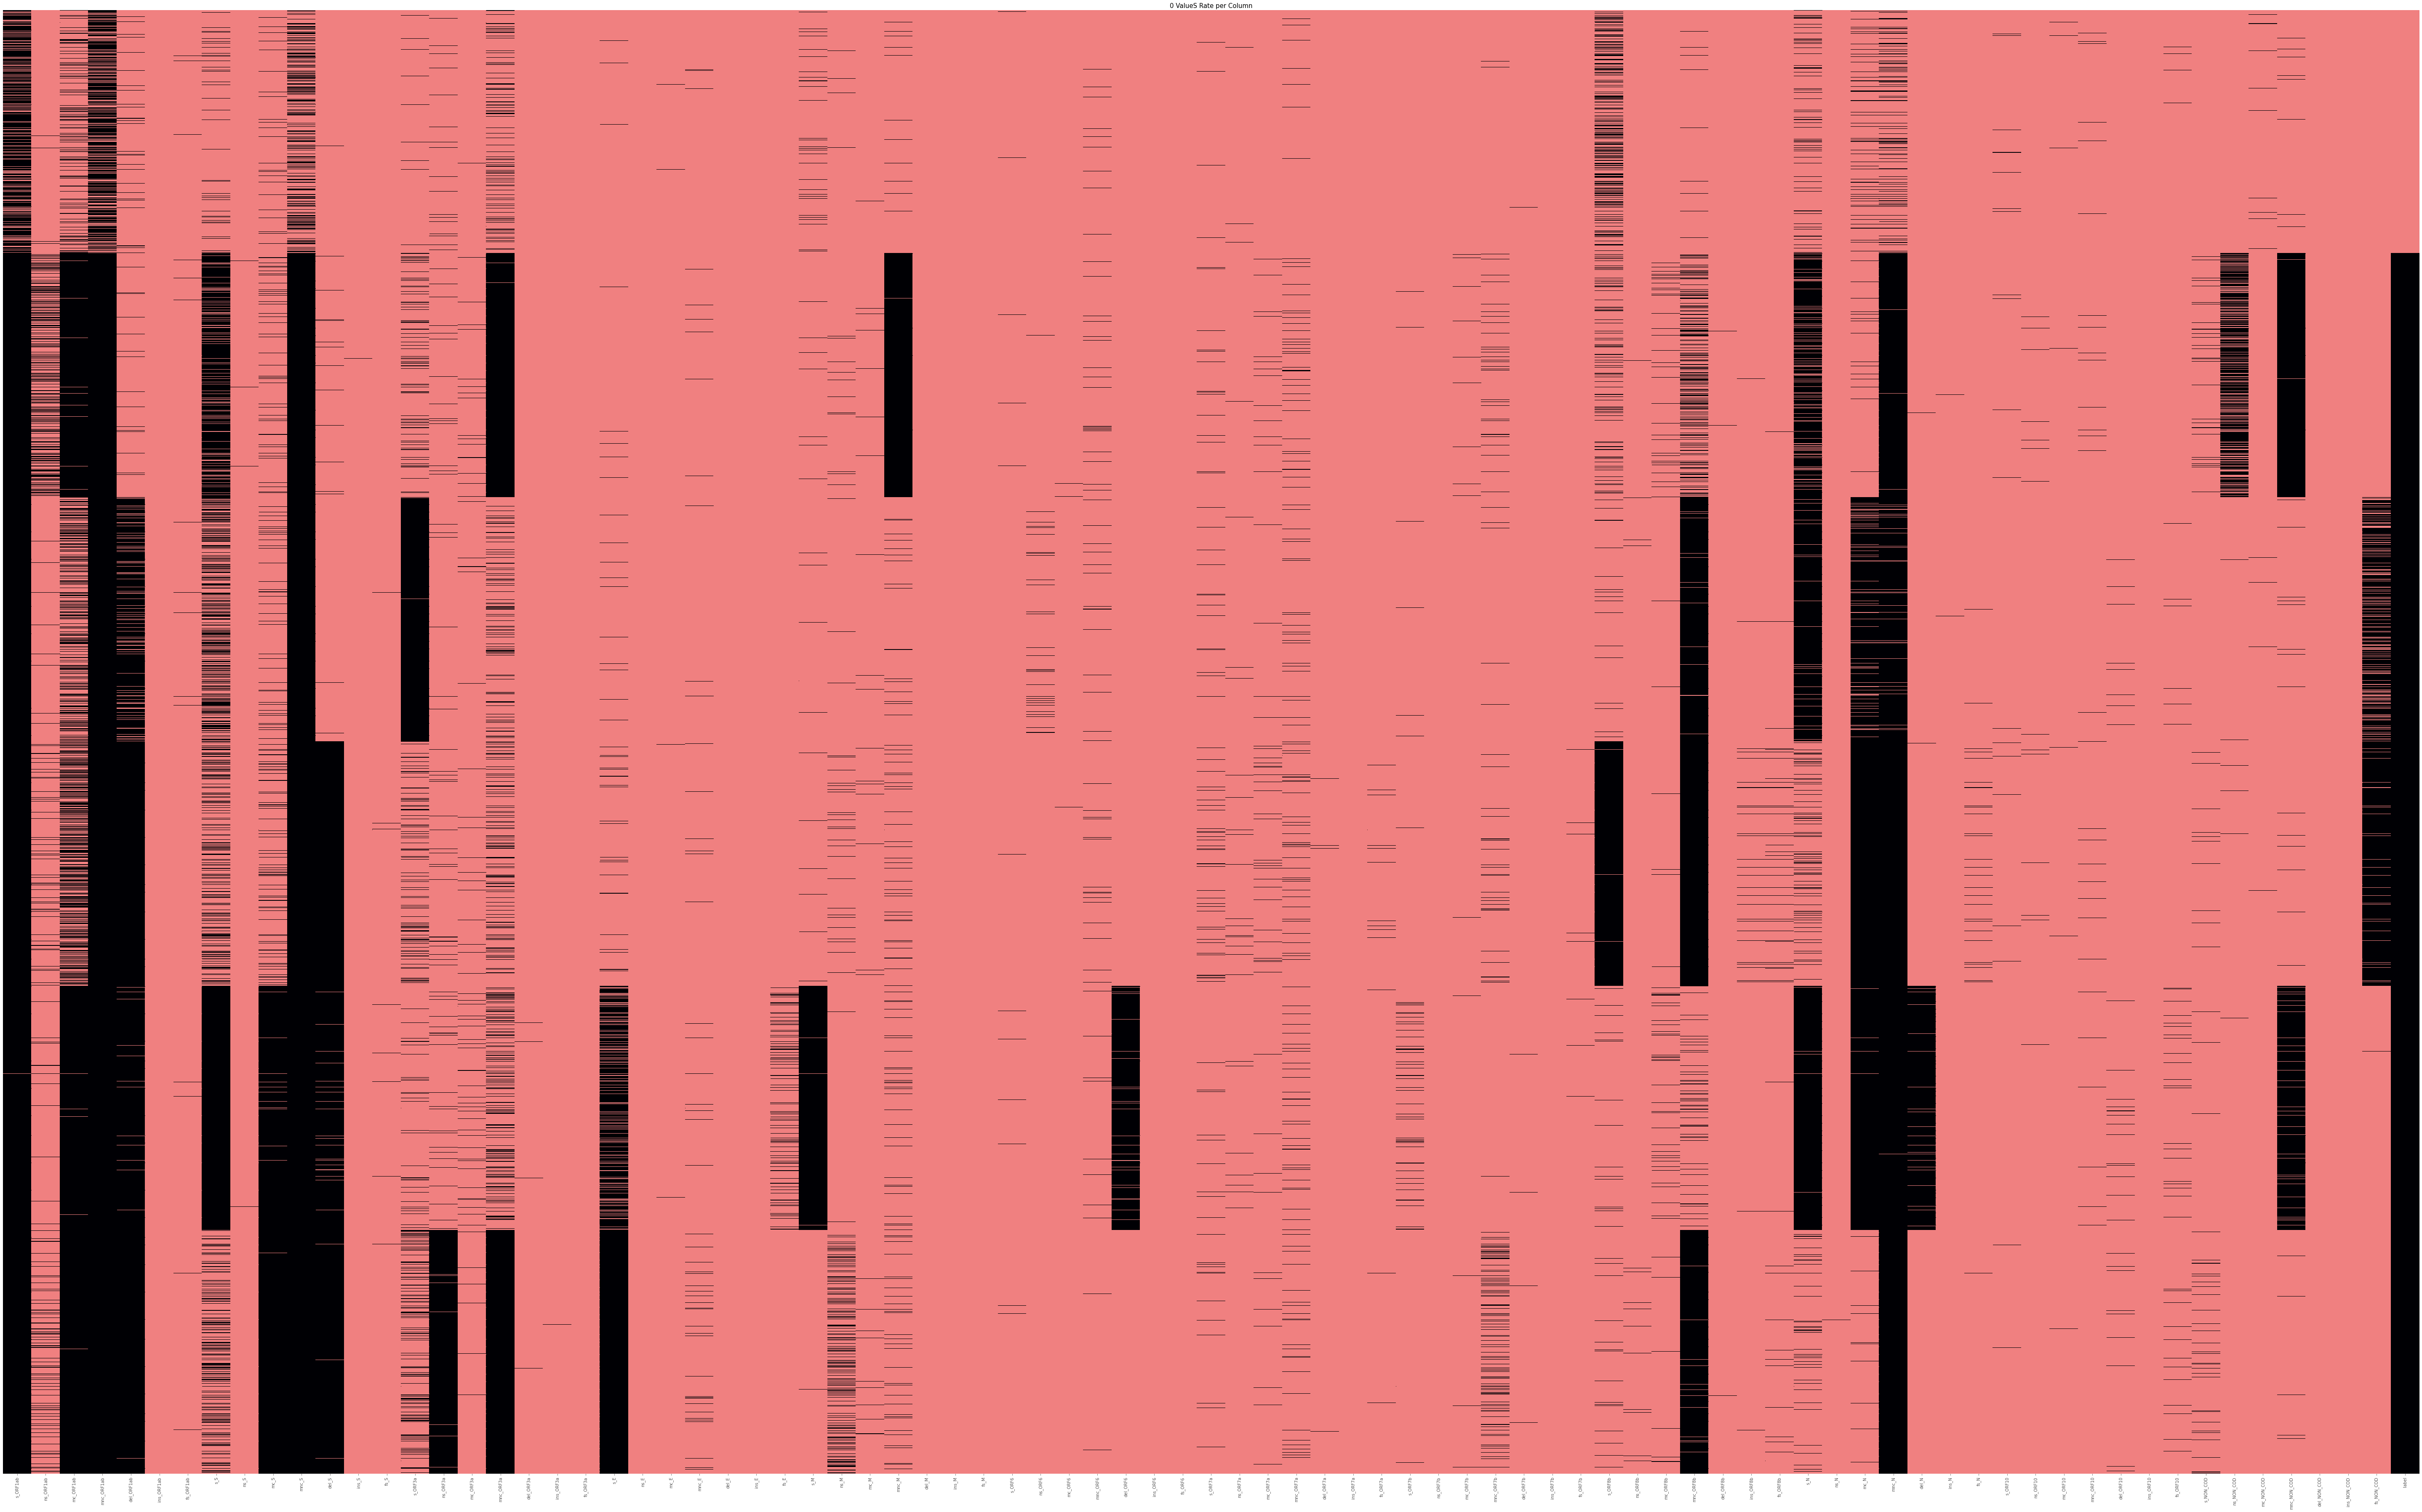

In [ ]:
null_per=nullscan(data)

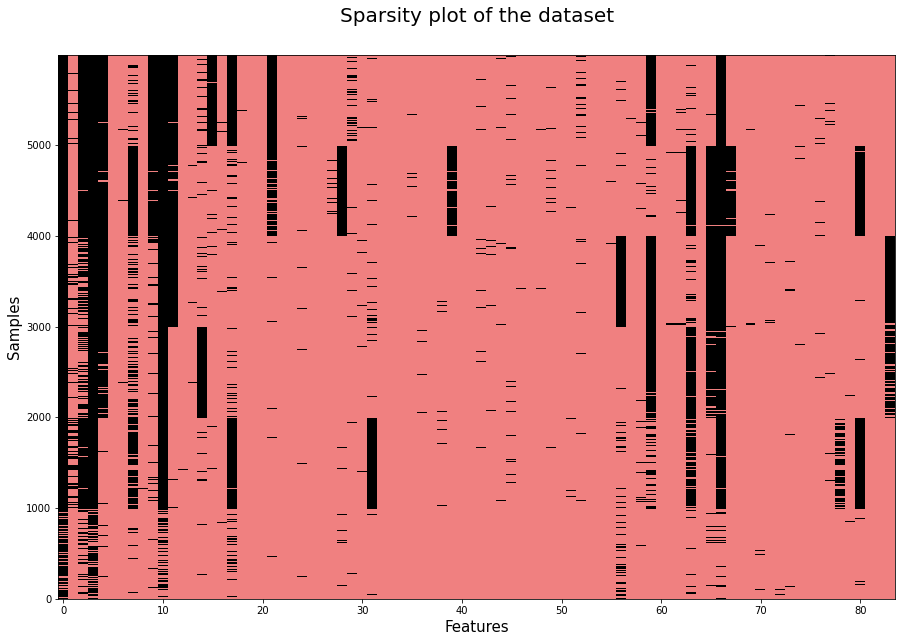

In [ ]:
import matplotlib as mp
cmap = ListedColormap(['lightcoral','black'])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
ax.spy(np.array(data.drop(columns='label',inplace=False)),aspect='auto',cmap=cmap,origin='lower',)
plt.title('Sparsity plot of the dataset',fontsize=20)
plt.xlabel('Features',fontsize=15)
plt.ylabel('Samples',fontsize=15)
ax.xaxis.set_ticks_position('bottom')
#mp.axis.XAxis.set_ticks_position(ax,'bottom')



In [ ]:
#If all the sample in a columns are quite null delete the column
for line,col_name in zip(null_per,data.columns):
  if line>0.99:
    data.drop(col_name,axis=1,inplace=True)

# Preprocessing

In [ ]:
#Train test split stratified 
x = data.copy()
y = x['label']
x.drop(columns='label', inplace = True)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, shuffle=True, stratify=y)
#Standardize data
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [ ]:
# integer encode for the label
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)

# Random Forest with select k_best


Stratified k-fold cross validation strategy in order to find best k value.

In [ ]:
kbest=range(2,40,2)
#5-fold
skf = StratifiedKFold(n_splits=5)
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
f2=[] #array used to store the mean f2 score among 5 fold 
acc=[]#array used to store the mean accuracy score among 5 fold 
from sklearn.metrics import plot_confusion_matrix
#tune the number of k-best element selected
for k in kbest:
  x_=SelectKBest(k=k).fit_transform(x_train,y_train)
  f2_=[]
  acc_=[]
  for train_index, test_index in skf.split(x_, y_train):
    X_train, X_test = x_[train_index], x_[test_index]
    Y_train, Y_test = y_train.iloc[train_index], y_train.iloc[test_index]
    rf=RandomForestClassifier()
    rf.fit(X_train,Y_train)
    pred=rf.predict(X_test)
    f2_.append(fbeta_score(pred,Y_test,beta=1,average='macro'))
    acc_.append(accuracy_score(pred,Y_test))
  

  f2.append(np.mean(f2_))
  acc.append(np.mean(acc_)*100


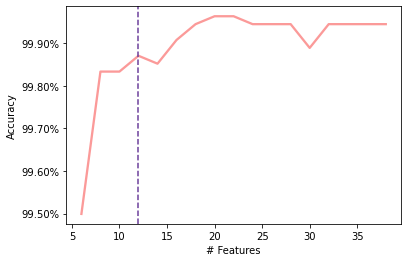

In [ ]:
#Plot the accuracy score for each k (mean accuracy among each 5 folds)
from matplotlib.colors import ListedColormap
import matplotlib.ticker as mtick
my_cmap = ListedColormap(sns.color_palette('Paired'))
plt.plot(kbest[2:],acc[2:],c=my_cmap.colors[4],linewidth=2.3)
ax=plt.gca()
#plt.title('Random Forest with Select K-best')
plt.axvline(x=12,c=my_cmap.colors[9],ls='--')

fmt = '%.2f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
plt.xlabel('# Features')
plt.ylabel('Accuracy')


plt.show()

In [ ]:
#Test with best k found( as soon the accuracy is high for quite all the k values the choose values is the one with the smaller number of features )
sk=SelectKBest(k=12)
x_tr=sk.fit_transform(x_train,y_train)
x_te=sk.transform(x_test)
rf=RandomForestClassifier()
rf.fit(x_tr,y_train)
acc=accuracy_score(y_test,rf.predict(x_te))
print(acc)
indices=sk.get_support(indices=True)
data.columns[indices]


0.9966666666666667


Index(['del_ORF1ab', 'mnc_S', 'del_S', 'ns_ORF3a', 's_E', 's_M', 'del_ORF6',
       'mc_N', 'mnc_N', 'del_N', 'mnc_NON_COD', 'fs_NON_COD'],
      dtype='object')

# Random Forest with RFE





parames=max_d:3n_est:5
38
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>
Optimal number of features : 38
Best features : Index(['ns_ORF1ab', 'mc_ORF1ab', 'mnc_ORF1ab', 'del_ORF1ab', 's_S', 'mc_S',
       'mnc_S', 'del_S', 's_ORF3a', 'ns_ORF3a', 'mc_ORF3a', 'mnc_ORF3a', 's_E',
       'mnc_E', 'fs_E', 's_M', 'ns_M', 'mnc_M', 'mnc_ORF6', 'del_ORF6',
       's_ORF7a', 'mc_ORF7a', 'mnc_ORF7a', 's_ORF7b', 'mnc_ORF7b', 's_ORF8b',
       'mc_ORF8b', 'mnc_ORF8b', 'f

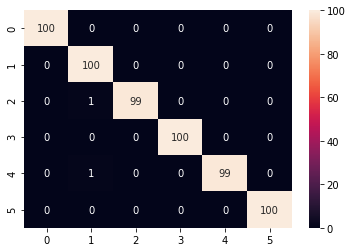




parames=max_d:3n_est:10
28
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>
Optimal number of features : 28
Best features : Index(['mnc_ORF1ab', 'del_ORF1ab', 's_S', 'mc_S', 'mnc_S', 'del_S', 's_ORF3a',
       'ns_ORF3a', 's_E', 'fs_E', 's_M', 'mnc_M', 'del_ORF6', 's_ORF7a',
       'mnc_ORF7a', 'mnc_ORF7b', 's_ORF8b', 'mc_ORF8b', 'mnc_ORF8b',
       'fs_ORF8b', 's_N', 'mc_N', 'mnc_N', 'del_N', 'fs_ORF10', 's_NON_COD',
       'ns_NON_COD', 'mnc_NON_COD'],
   

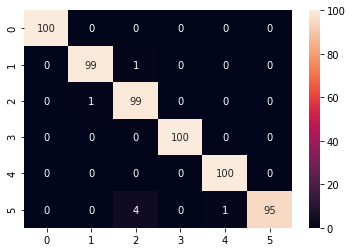




parames=max_d:3n_est:20
29
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>
Optimal number of features : 29
Best features : Index(['s_ORF1ab', 'ns_ORF1ab', 'mc_ORF1ab', 'mnc_ORF1ab', 'del_ORF1ab', 's_S',
       'mc_S', 'mnc_S', 'del_S', 'ns_ORF3a', 'mnc_ORF3a', 's_E', 's_M', 'ns_M',
       'mnc_M', 'del_ORF6', 's_ORF7a', 'mnc_ORF7b', 's_ORF8b', 'mnc_ORF8b',
       'fs_ORF8b', 's_N', 'mc_N', 'mnc_N', 'del_N', 'fs_ORF10', 's_NON_COD',
       'ns_NON_COD', 'mnc

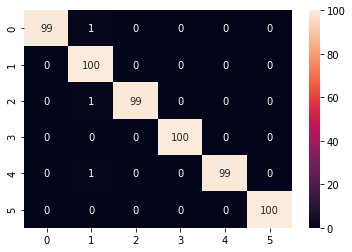




parames=max_d:3n_est:30
32
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>
Optimal number of features : 32
Best features : Index(['s_ORF1ab', 'ns_ORF1ab', 'mc_ORF1ab', 'mnc_ORF1ab', 'del_ORF1ab', 's_S',
       'mc_S', 'mnc_S', 'del_S', 's_ORF3a', 'ns_ORF3a', 'mc_ORF3a',
       'mnc_ORF3a', 's_E', 'mnc_E', 'fs_E', 's_M', 'mnc_M', 'del_ORF6',
       'mc_ORF7a', 'mnc_ORF7a', 's_ORF7b', 's_ORF8b', 'mnc_ORF8b', 's_N',
       'mc_N', 'mnc_N', 'del_N', 'fs_ORF10',

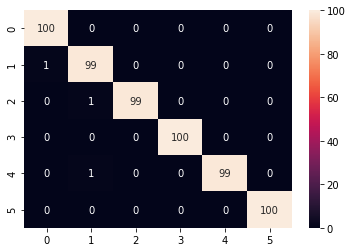




parames=max_d:3n_est:40
32
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>
Optimal number of features : 32
Best features : Index(['s_ORF1ab', 'ns_ORF1ab', 'mc_ORF1ab', 'mnc_ORF1ab', 'del_ORF1ab', 's_S',
       'mc_S', 'mnc_S', 'del_S', 's_ORF3a', 'ns_ORF3a', 'mnc_ORF3a', 's_E',
       'fs_E', 's_M', 'ns_M', 'mnc_M', 'del_ORF6', 's_ORF7a', 'mc_ORF7a',
       's_ORF7b', 's_ORF8b', 'mc_ORF8b', 'mnc_ORF8b', 's_N', 'mc_N', 'mnc_N',
       'del_N', 's_NON_COD', '

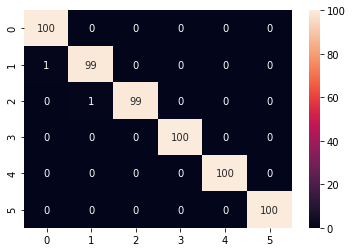




parames=max_d:4n_est:5
39
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>
Optimal number of features : 39
Best features : Index(['s_ORF1ab', 'ns_ORF1ab', 'mc_ORF1ab', 'mnc_ORF1ab', 'del_ORF1ab', 's_S',
       'mc_S', 'mnc_S', 'del_S', 's_ORF3a', 'ns_ORF3a', 'mc_ORF3a',
       'mnc_ORF3a', 's_E', 'mnc_E', 'fs_E', 's_M', 'ns_M', 'mnc_M', 'mnc_ORF6',
       'del_ORF6', 's_ORF7a', 'mc_ORF7a', 'mnc_ORF7a', 's_ORF7b', 'mnc_ORF7b',
       's_ORF8b', 'mc_ORF8b', 'mn

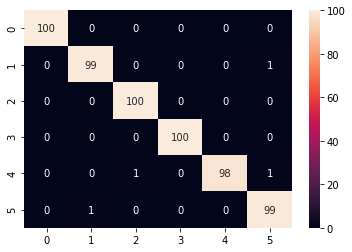




parames=max_d:4n_est:10
30
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>
Optimal number of features : 30
Best features : Index(['s_ORF1ab', 'ns_ORF1ab', 'mc_ORF1ab', 'mnc_ORF1ab', 'del_ORF1ab', 's_S',
       'mc_S', 'mnc_S', 'del_S', 's_ORF3a', 'ns_ORF3a', 'mc_ORF3a', 's_E',
       'mnc_E', 's_M', 'mnc_M', 'del_ORF6', 's_ORF7a', 'mnc_ORF7a', 's_ORF7b',
       'mnc_ORF7b', 'mnc_ORF8b', 's_N', 'mc_N', 'mnc_N', 'del_N', 's_NON_COD',
       'ns_NON_COD', 'mnc

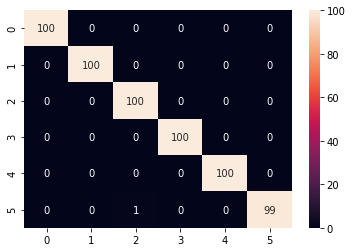




parames=max_d:4n_est:20
29
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>
Optimal number of features : 29
Best features : Index(['s_ORF1ab', 'ns_ORF1ab', 'mc_ORF1ab', 'mnc_ORF1ab', 'del_ORF1ab', 's_S',
       'mc_S', 'mnc_S', 'del_S', 's_ORF3a', 'ns_ORF3a', 'mc_ORF3a',
       'mnc_ORF3a', 's_E', 's_M', 'mnc_M', 'del_ORF6', 's_ORF7a', 's_ORF8b',
       'mnc_ORF8b', 'fs_ORF8b', 's_N', 'mc_N', 'mnc_N', 'del_N', 'fs_ORF10',
       'ns_NON_COD', 'mnc_NON_COD', 

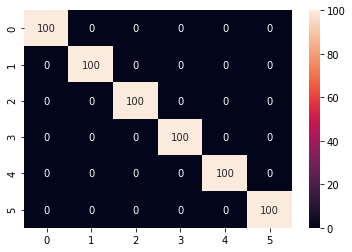




parames=max_d:4n_est:30
34
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>
Optimal number of features : 34
Best features : Index(['s_ORF1ab', 'ns_ORF1ab', 'mc_ORF1ab', 'mnc_ORF1ab', 'del_ORF1ab', 's_S',
       'mc_S', 'mnc_S', 'del_S', 's_ORF3a', 'ns_ORF3a', 'mc_ORF3a',
       'mnc_ORF3a', 's_E', 'mnc_E', 's_M', 'ns_M', 'mnc_M', 'del_ORF6',
       'mnc_ORF7a', 's_ORF7b', 's_ORF8b', 'mc_ORF8b', 'mnc_ORF8b', 'fs_ORF8b',
       's_N', 'mc_N', 'mnc_N', 'del_N',

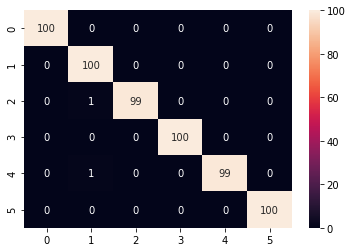




parames=max_d:4n_est:40
39
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>
Optimal number of features : 39
Best features : Index(['s_ORF1ab', 'ns_ORF1ab', 'mc_ORF1ab', 'mnc_ORF1ab', 'del_ORF1ab', 's_S',
       'mc_S', 'mnc_S', 'del_S', 's_ORF3a', 'ns_ORF3a', 'mc_ORF3a',
       'mnc_ORF3a', 's_E', 'mnc_E', 'fs_E', 's_M', 'ns_M', 'mnc_M', 'mnc_ORF6',
       'del_ORF6', 's_ORF7a', 'mc_ORF7a', 'mnc_ORF7a', 's_ORF7b', 'mnc_ORF7b',
       's_ORF8b', 'mc_ORF8b', '

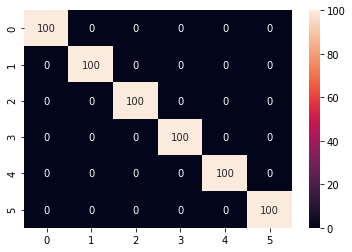




parames=max_d:5n_est:5
38
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>
Optimal number of features : 38
Best features : Index(['s_ORF1ab', 'ns_ORF1ab', 'mc_ORF1ab', 'mnc_ORF1ab', 'del_ORF1ab', 's_S',
       'mc_S', 'mnc_S', 'del_S', 's_ORF3a', 'ns_ORF3a', 'mc_ORF3a',
       'mnc_ORF3a', 's_E', 'mnc_E', 'fs_E', 's_M', 'ns_M', 'mnc_M', 'del_ORF6',
       's_ORF7a', 'mc_ORF7a', 'mnc_ORF7a', 's_ORF7b', 'mnc_ORF7b', 's_ORF8b',
       'mc_ORF8b', 'mnc_ORF8b', 'f

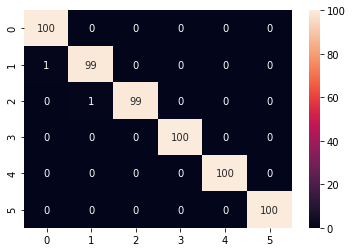




parames=max_d:5n_est:10
36
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>
Optimal number of features : 36
Best features : Index(['s_ORF1ab', 'ns_ORF1ab', 'mc_ORF1ab', 'mnc_ORF1ab', 'del_ORF1ab', 's_S',
       'mc_S', 'mnc_S', 'del_S', 's_ORF3a', 'ns_ORF3a', 'mc_ORF3a',
       'mnc_ORF3a', 's_E', 'mnc_E', 'fs_E', 's_M', 'ns_M', 'mnc_M', 'del_ORF6',
       's_ORF7a', 'mc_ORF7a', 'mnc_ORF7a', 's_ORF7b', 's_ORF8b', 'mc_ORF8b',
       'mnc_ORF8b', 'fs_ORF8b', '

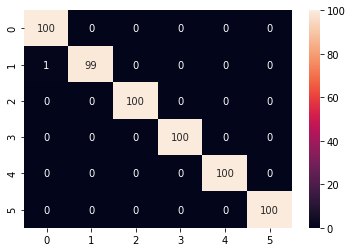




parames=max_d:5n_est:20
37
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>
Optimal number of features : 37
Best features : Index(['s_ORF1ab', 'ns_ORF1ab', 'mc_ORF1ab', 'mnc_ORF1ab', 'del_ORF1ab', 's_S',
       'mc_S', 'mnc_S', 'del_S', 's_ORF3a', 'ns_ORF3a', 'mnc_ORF3a', 's_E',
       'mnc_E', 'fs_E', 's_M', 'ns_M', 'mnc_M', 'del_ORF6', 's_ORF7a',
       'mc_ORF7a', 'mnc_ORF7a', 's_ORF7b', 'mnc_ORF7b', 's_ORF8b', 'mc_ORF8b',
       'mnc_ORF8b', 'fs_ORF8b', 

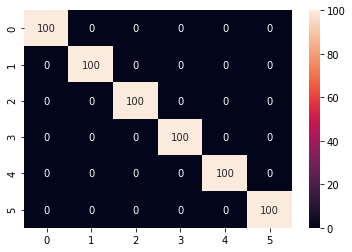




parames=max_d:5n_est:30
23
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>
Optimal number of features : 23
Best features : Index(['s_ORF1ab', 'mc_ORF1ab', 'mnc_ORF1ab', 'del_ORF1ab', 'mc_S', 'mnc_S',
       'del_S', 's_ORF3a', 'ns_ORF3a', 'mnc_ORF3a', 's_E', 's_M', 'mnc_M',
       'del_ORF6', 's_ORF8b', 'mnc_ORF8b', 's_N', 'mc_N', 'mnc_N', 'del_N',
       'ns_NON_COD', 'mnc_NON_COD', 'fs_NON_COD'],
      dtype='object')
Recall is:  1.0
Accuracy is:  1.0
F1 

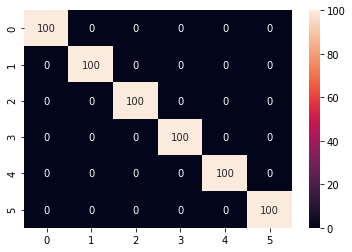




parames=max_d:5n_est:40
34
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>
Optimal number of features : 34
Best features : Index(['s_ORF1ab', 'ns_ORF1ab', 'mc_ORF1ab', 'mnc_ORF1ab', 'del_ORF1ab', 's_S',
       'mc_S', 'mnc_S', 'del_S', 's_ORF3a', 'ns_ORF3a', 'mc_ORF3a',
       'mnc_ORF3a', 's_E', 'mnc_E', 's_M', 'ns_M', 'mnc_M', 'del_ORF6',
       'mc_ORF7a', 'mnc_ORF7a', 'mnc_ORF7b', 's_ORF8b', 'mc_ORF8b',
       'mnc_ORF8b', 's_N', 'mc_N', 'mnc_N', 'del_N

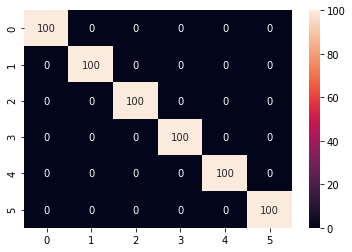




parames=max_d:10n_est:5
30
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>
Optimal number of features : 30
Best features : Index(['s_ORF1ab', 'ns_ORF1ab', 'mc_ORF1ab', 'mnc_ORF1ab', 'del_ORF1ab', 's_S',
       'mc_S', 'mnc_S', 'del_S', 's_ORF3a', 'ns_ORF3a', 'mnc_ORF3a', 's_E',
       'mnc_E', 'fs_E', 's_M', 'mnc_M', 'del_ORF6', 'mc_ORF7a', 'mnc_ORF7a',
       'mnc_ORF7b', 's_ORF8b', 'mnc_ORF8b', 's_N', 'mc_N', 'mnc_N', 'del_N',
       'ns_NON_COD', 'mnc_NO

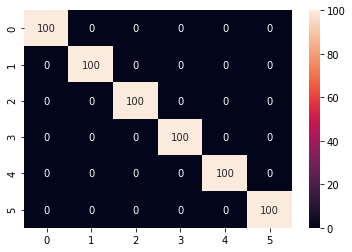




parames=max_d:10n_est:10
27
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>
Optimal number of features : 27
Best features : Index(['s_ORF1ab', 'ns_ORF1ab', 'mc_ORF1ab', 'mnc_ORF1ab', 'del_ORF1ab', 's_S',
       'mc_S', 'mnc_S', 'del_S', 's_ORF3a', 'ns_ORF3a', 'mnc_ORF3a', 's_E',
       's_M', 'ns_M', 'mnc_M', 'del_ORF6', 's_ORF8b', 'mc_ORF8b', 'mnc_ORF8b',
       's_N', 'mc_N', 'mnc_N', 'del_N', 'ns_NON_COD', 'mnc_NON_COD',
       'fs_NON_COD'],
      dtyp

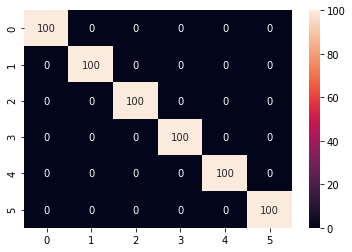




parames=max_d:10n_est:20
27
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>
Optimal number of features : 27
Best features : Index(['s_ORF1ab', 'ns_ORF1ab', 'mc_ORF1ab', 'mnc_ORF1ab', 'del_ORF1ab', 's_S',
       'mc_S', 'mnc_S', 'del_S', 's_ORF3a', 'ns_ORF3a', 'mnc_ORF3a', 's_E',
       's_M', 'ns_M', 'mnc_M', 'del_ORF6', 's_ORF8b', 'mnc_ORF8b', 's_N',
       'mc_N', 'mnc_N', 'del_N', 's_NON_COD', 'ns_NON_COD', 'mnc_NON_COD',
       'fs_NON_COD'],
      dty

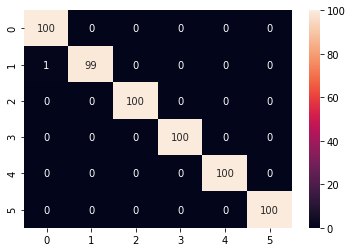




parames=max_d:10n_est:30
26
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>
Optimal number of features : 26
Best features : Index(['s_ORF1ab', 'ns_ORF1ab', 'mc_ORF1ab', 'mnc_ORF1ab', 'del_ORF1ab', 's_S',
       'mc_S', 'mnc_S', 'del_S', 's_ORF3a', 'ns_ORF3a', 'mnc_ORF3a', 's_E',
       's_M', 'ns_M', 'mnc_M', 'del_ORF6', 's_ORF8b', 'mnc_ORF8b', 's_N',
       'mc_N', 'mnc_N', 'del_N', 'ns_NON_COD', 'mnc_NON_COD', 'fs_NON_COD'],
      dtype='object')
Recall 

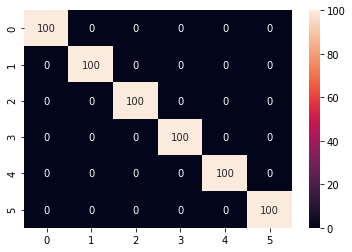




parames=max_d:10n_est:40
13
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>
Optimal number of features : 13
Best features : Index(['mnc_S', 'del_S', 'ns_ORF3a', 's_E', 's_M', 'mnc_M', 'del_ORF6', 's_N',
       'mc_N', 'mnc_N', 'del_N', 'mnc_NON_COD', 'fs_NON_COD'],
      dtype='object')
Recall is:  1.0
Accuracy is:  1.0
F1 score is:  1.0
Precision is: 1.0


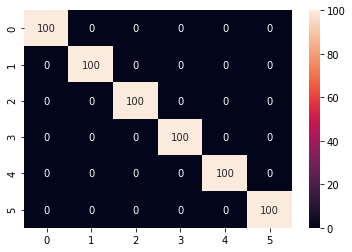




parames=max_d:15n_est:5
35
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>
Optimal number of features : 35
Best features : Index(['s_ORF1ab', 'ns_ORF1ab', 'mc_ORF1ab', 'mnc_ORF1ab', 'del_ORF1ab', 's_S',
       'mc_S', 'mnc_S', 'del_S', 's_ORF3a', 'ns_ORF3a', 'mc_ORF3a',
       'mnc_ORF3a', 's_E', 'mnc_E', 'fs_E', 's_M', 'mnc_M', 'del_ORF6',
       's_ORF7a', 'mc_ORF7a', 'mnc_ORF7b', 's_ORF8b', 'mc_ORF8b', 'mnc_ORF8b',
       'fs_ORF8b', 's_N', 'mc_N', 'mnc_

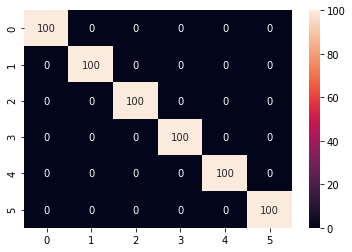




parames=max_d:15n_est:10
27
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>
Optimal number of features : 27
Best features : Index(['s_ORF1ab', 'ns_ORF1ab', 'mc_ORF1ab', 'mnc_ORF1ab', 'del_ORF1ab', 's_S',
       'mc_S', 'mnc_S', 'del_S', 's_ORF3a', 'ns_ORF3a', 'mnc_ORF3a', 's_E',
       's_M', 'mnc_M', 'del_ORF6', 'mnc_ORF7a', 'mnc_ORF7b', 's_ORF8b',
       'mnc_ORF8b', 's_N', 'mc_N', 'mnc_N', 'del_N', 'ns_NON_COD',
       'mnc_NON_COD', 'fs_NON_COD'],
    

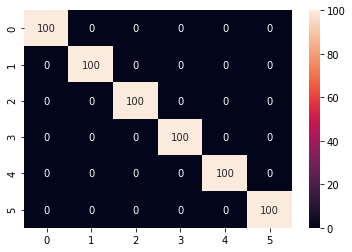




parames=max_d:15n_est:20
24
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>
Optimal number of features : 24
Best features : Index(['s_ORF1ab', 'mc_ORF1ab', 'mnc_ORF1ab', 'del_ORF1ab', 's_S', 'mc_S',
       'mnc_S', 'del_S', 's_ORF3a', 'ns_ORF3a', 'mnc_ORF3a', 's_E', 's_M',
       'mnc_M', 'del_ORF6', 's_ORF8b', 'mnc_ORF8b', 's_N', 'mc_N', 'mnc_N',
       'del_N', 'ns_NON_COD', 'mnc_NON_COD', 'fs_NON_COD'],
      dtype='object')
Recall is:  0.99833333333333

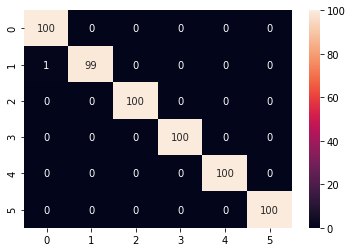




parames=max_d:15n_est:30
26
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>
Optimal number of features : 26
Best features : Index(['s_ORF1ab', 'ns_ORF1ab', 'mc_ORF1ab', 'mnc_ORF1ab', 'del_ORF1ab', 's_S',
       'mc_S', 'mnc_S', 'del_S', 's_ORF3a', 'ns_ORF3a', 'mnc_ORF3a', 's_E',
       's_M', 'ns_M', 'mnc_M', 'del_ORF6', 's_ORF8b', 'mnc_ORF8b', 's_N',
       'mc_N', 'mnc_N', 'del_N', 'ns_NON_COD', 'mnc_NON_COD', 'fs_NON_COD'],
      dtype='object')
Recall 

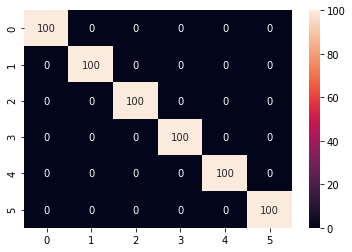




parames=max_d:15n_est:40
35
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>
Optimal number of features : 35
Best features : Index(['s_ORF1ab', 'ns_ORF1ab', 'mc_ORF1ab', 'mnc_ORF1ab', 'del_ORF1ab', 's_S',
       'mc_S', 'mnc_S', 'del_S', 's_ORF3a', 'ns_ORF3a', 'mc_ORF3a',
       'mnc_ORF3a', 's_E', 'mnc_E', 's_M', 'ns_M', 'mnc_M', 'del_ORF6',
       's_ORF7a', 'mc_ORF7a', 'mnc_ORF7a', 'mnc_ORF7b', 's_ORF8b', 'mc_ORF8b',
       'mnc_ORF8b', 'fs_ORF8b', 's_N'

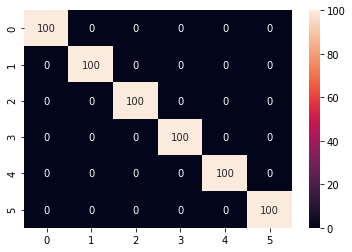

CONCLUSION:
best precision is: 1.0
max_depth: 15
num_of_estimator: 40
num_best_features 35
best_features= Index(['s_ORF1ab', 'ns_ORF1ab', 'mc_ORF1ab', 'mnc_ORF1ab', 'del_ORF1ab', 's_S',
       'mc_S', 'mnc_S', 'del_S', 's_ORF3a', 'ns_ORF3a', 'mc_ORF3a',
       'mnc_ORF3a', 's_E', 'mnc_E', 's_M', 'ns_M', 'mnc_M', 'del_ORF6',
       's_ORF7a', 'mc_ORF7a', 'mnc_ORF7a', 'mnc_ORF7b', 's_ORF8b', 'mc_ORF8b',
       'mnc_ORF8b', 'fs_ORF8b', 's_N', 'mc_N', 'mnc_N', 'del_N', 's_NON_COD',
       'ns_NON_COD', 'mnc_NON_COD', 'fs_NON_COD'],
      dtype='object')


In [ ]:
#TRAIN WITH RFE On RF
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score
max_depth=[3,4,5,10,15]
num_estimators=[5,10,20,30,40]
best=0
bd=0 #best deph found
mf=0 #best num estimator found
num_best=[]  #number of best features found at the end of each 5 folds 
best_features=[] #number of best features found at the end of each 5 folds
n_features=[]
for d in max_depth:
  for f in num_estimators:
    clf =RandomForestClassifier(random_state=42,max_depth=d,n_estimators=f) 
    rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='accuracy')   #5-fold cross-validation
    rfecv = rfecv.fit(x_train, y_train)
    n_features.append(rfecv.n_features_)
    print('\n\n')
    print('parames=max_d:'+str(d)+'n_est:'+str(f))
    print(rfecv.n_features_)
    print(clf.get_params)
    print('Optimal number of features :', rfecv.n_features_)
    print('Best features :', x.columns[rfecv.support_])
    recall = recall_score(y_test,rfecv.predict(x_test),average='macro')
    print('Recall is: ', recall)
    accuracy = accuracy_score(y_test,rfecv.predict(x_test))
    print('Accuracy is: ', accuracy)
    f1 = f1_score(y_test,rfecv.predict(x_test),average='macro')
    print('F1 score is: ', f1)
    cm = confusion_matrix(y_test,rfecv.predict(x_test))
    pre = precision_score(y_test,rfecv.predict(x_test),average='macro')

    print('Precision is:' ,pre)
    
    if f1>=best: #find the best configuration updating the local maximum
        best=precision_score(y_test,rfecv.predict(x_test),average='macro')
        bd=d
        mf=f
        num_best=rfecv.n_features_
        best_features=x.columns[rfecv.support_]
        
      
  
    plt.figure()
    sns.heatmap(cm,annot=True,fmt="d")
    plt.show()
print('CONCLUSION:')
print('best accuracy is:',best)
print('max_depth:',bd)
print('num_of_estimator:',mf)
print('num_best_features',num_best)
print('best_features=',best_features)

In [ ]:
n_featuress=np.array(n_features).reshape((5,5))
import matplotlib
def heatmap(data, row_labels, col_labels, ax=None,cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()


    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=False, bottom=True,
                   labeltop=False, labelbottom=True)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")
    plt.ylabel('Max Depth')
    plt.xlabel('# Trees')

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar



def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts


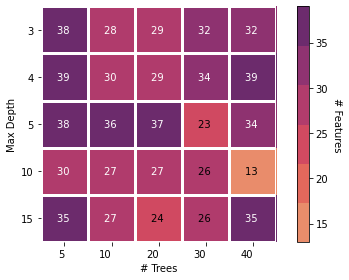

In [ ]:
#Heatmap representing the number of best features selected for each max_deph, #Tree selected

from matplotlib.colors import ListedColormap
import matplotlib.ticker as mtick
my_cmap2 = ListedColormap(sns.color_palette('flare'))
fig, ax = plt.subplots()

im, cbar = heatmap(n_featuress, max_depth, num_estimators, ax=ax,
                   cmap=my_cmap2, cbarlabel="# Features")
texts = annotate_heatmap(im, valfmt="{x} ")

fig.tight_layout()
plt.show()

# PCA and SVM


In [ ]:
#Copy the data and split in train and  test 
x = data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, shuffle=True, stratify=y)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
# Standardize train set and apply the transformation on the test set
qt=StandardScaler()
x_train=qt.fit_transform(x_train)
x_test=qt.transform(x_test)

([<matplotlib.axis.XTick at 0x7f78edb30f50>,
 [Text(0, 0, '1'),
  Text(0, 0, '3'),
  Text(0, 0, '5'),
  Text(0, 0, '7'),
  Text(0, 0, '9'),
  Text(0, 0, '11'),
  Text(0, 0, '13'),
  Text(0, 0, '15'),
  Text(0, 0, '17'),
  Text(0, 0, '19')])

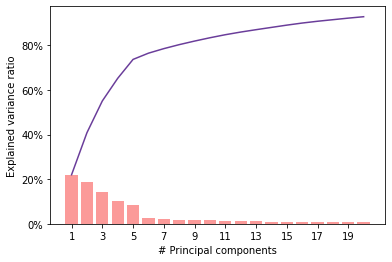

In [ ]:

# PCA after scalarization
n = 20
pca = PCA(n_components = n, svd_solver = 'full')
pca.fit(data)
projected=pca.fit_transform(x_train)

# cumulative variance 
cumvar = np.zeros([n,1])
for i in range(n):
  cumvar[i] = sum(pca.explained_variance_ratio_[:i+1])

# plots 
v=np.array(pca.explained_variance_ratio_)
plt.bar(range(0,len(pca.explained_variance_ratio_)),v*100, color = my_cmap.colors[4])
plt.plot(cumvar*100,color = my_cmap.colors[9])
ax=plt.gca()
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
plt.xlabel('# Principal components')
plt.ylabel('Explained variance ratio')
plt.xticks(np.arange(len(v),step=2),np.arange(1,len(v)+1,step=2))




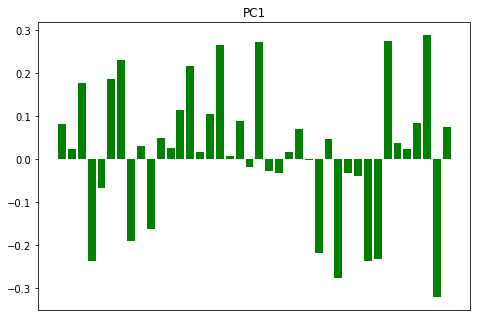



 Top features for PC1: 
       Feature Component
0  mnc_NON_COD   0.28731
1        del_N  0.273186
2     del_ORF6  0.272892
3          s_M  0.265128
4         mc_S  0.230307
5          s_E  0.215224

Bottom features for PC1: 
       Feature Component
34     s_ORF8b -0.218468
35       mnc_N -0.233265
36        mc_N -0.237069
37  mnc_ORF1ab -0.239068
38   mnc_ORF8b -0.277255
39  fs_NON_COD -0.322349


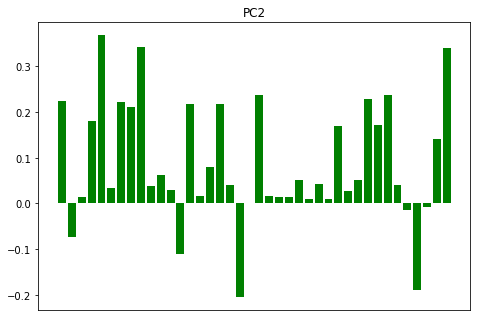



 Top features for PC2: 
      Feature Component
0  del_ORF1ab  0.367446
1       del_S  0.341312
2       label  0.339168
3       del_N  0.236406
4    del_ORF6  0.236021
5        mc_N  0.227525

Bottom features for PC2: 
        Feature   Component
34  mnc_NON_COD -0.00701685
35    s_NON_COD  -0.0153899
36    ns_ORF1ab   -0.073969
37    mnc_ORF3a   -0.110133
38   ns_NON_COD   -0.189534
39        mnc_M   -0.205237


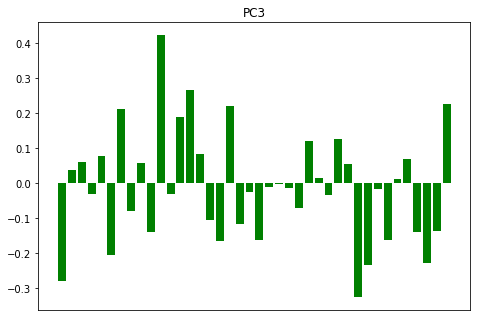



 Top features for PC3: 
     Feature Component
0   ns_ORF3a  0.420751
1        s_E  0.263625
2      label  0.223899
3       ns_M  0.218935
4       mc_S  0.211764
5  mnc_ORF3a  0.186494

Bottom features for PC3: 
        Feature Component
34          s_M -0.165365
35          s_S -0.206208
36  mnc_NON_COD -0.230752
37         mc_N -0.234788
38     s_ORF1ab -0.280276
39          s_N -0.327219


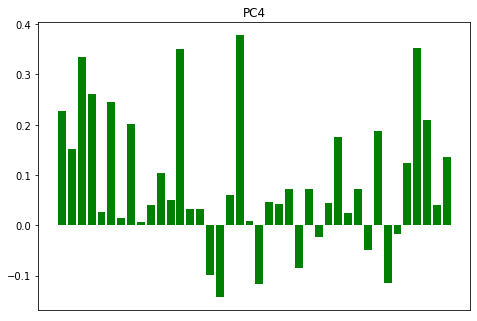



 Top features for PC4: 
      Feature Component
0       mnc_M  0.377547
1  ns_NON_COD  0.351723
2   mnc_ORF3a  0.350825
3   mc_ORF1ab  0.334537
4  mnc_ORF1ab   0.26018
5         s_S  0.244812

Bottom features for PC4: 
     Feature  Component
34      mc_N -0.0490638
35   s_ORF7b -0.0852756
36      fs_E -0.0994931
37     del_N  -0.114272
38  del_ORF6  -0.116095
39       s_M   -0.14302


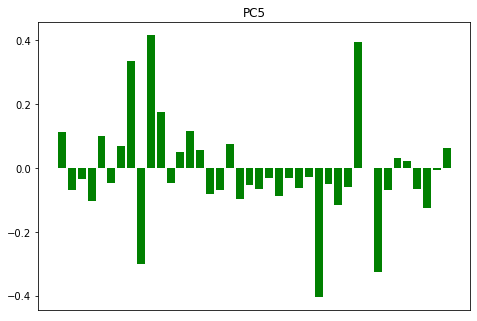



 Top features for PC5: 
    Feature Component
0   s_ORF3a  0.415986
1       s_N  0.394245
2     mnc_S   0.33662
3  ns_ORF3a  0.175938
4       s_E  0.115609
5  s_ORF1ab  0.112798

Bottom features for PC5: 
        Feature Component
34   mnc_ORF1ab -0.102484
35    mnc_ORF8b -0.116388
36  mnc_NON_COD -0.126194
37        del_S  -0.30232
38        mnc_N -0.325995
39      s_ORF8b -0.405345


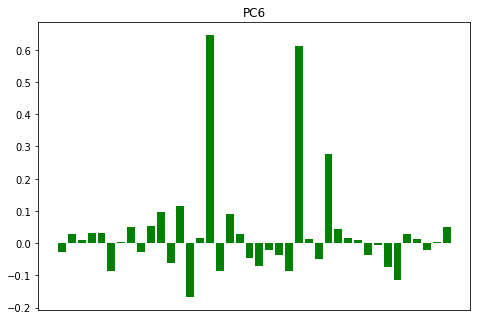



 Top features for PC6: 
     Feature  Component
0       fs_E   0.644618
1    s_ORF7b   0.611773
2   mc_ORF8b   0.275405
3  mnc_ORF3a   0.116446
4   ns_ORF3a  0.0958759
5       ns_M  0.0895458

Bottom features for PC6: 
      Feature  Component
34      del_N -0.0753494
35  mnc_ORF7a -0.0854316
36        s_M -0.0867673
37        s_S -0.0876831
38   fs_ORF10   -0.11528
39        s_E  -0.167995


In [ ]:
# barplots and iterpretations
n_columns = data.shape[1]
comp_features = []
lists1 = []
lists2 = []

for p in range(6):
  comp_features = []
  for i in range(n_columns):
    comp_features.append(pca.components_[p,i])

  ind = np.argsort(comp_features)
  comp_features.sort(reverse = True)

  columns_sorted_bottom =[data.columns[i] for i in ind]
  columns_sorted_top = columns_sorted_bottom.copy()
  columns_sorted_top.reverse()

  lists1.append(columns_sorted_top)
  lists2.append(comp_features)
  comp_order = pd.DataFrame([columns_sorted_top,comp_features]).transpose()
  comp_order.columns = ['Feature', 'Component']

  
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.bar(range(pca.components_.shape[1]), pca.components_[p, :], color = 'green')
  ax.axes.get_xaxis().set_ticks([])
  ax.set_title('PC' + str(p+1))
  plt.show()
  print('\n\n Top features for PC' + str(p+1) + ': ')
  print(comp_order.head(6))
  print('\nBottom features for PC' + str(p+1) + ': ')
  print(comp_order.tail(6))

In [ ]:
#3d PCA Result 
import plotly.express as px
fig = px.scatter_3d(
    projected, x=0, y=1, z=2, color=y_train,
    labels={'0': 'PC1', '1': 'PC2', '2': 'PC3'})

fig.show()

In [ ]:
my_cmap = ListedColormap(sns.color_palette('Paired'))
pca=PCA(n_components=4)

qt=StandardScaler()
x_train=qt.fit_transform(x_train)
x_test=qt.transform(x_test)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)


In [ ]:
#Integer encoding for the label
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
y_train=le.fit_transform(y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:881: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:881: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:881: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:881: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



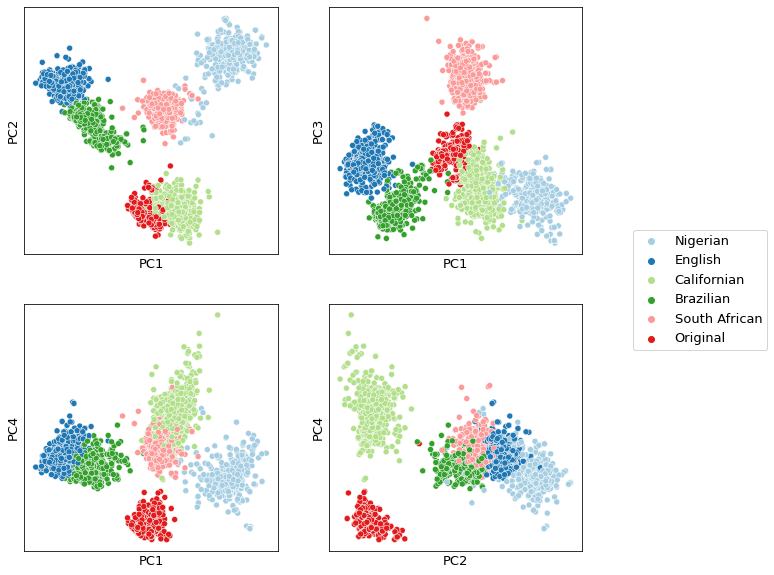

In [ ]:
#Visulization of PCA in 2D
size=13
map = {0 : "Original", 1 : "Californian", 2 : "Brazilian", 3 : "English", 4 : "Nigerian", 5 : "South African"}
y_new=[]#Map labels in class names
for y in y_train:
  y_new.append(map[y])
fig, axs = plt.subplots(2, 2,figsize=(10,10))
sns.scatterplot(ax=axs[0,0],x=x_train_pca[:, 0], y=x_train_pca[:, 1],data=x_train,hue=y_new,palette='Paired',legend=False)
axs[0,0].set_xlabel('PC1',size=size)
axs[0,0].set_ylabel('PC2',size=size)
axs[0, 0].set(xticks = [], yticks = [])
#axs[0,0].legend(y_train,map)
sns.scatterplot(ax=axs[0,1],x=x_train_pca[:, 0], y=x_train_pca[:, 2],data=x_train,hue=y_new,palette='Paired',legend=False)

axs[0,1].set_xlabel('PC1',size=size)
axs[0,1].set_ylabel('PC3',size=size)
axs[0, 1].set(xticks = [], yticks = [])

sns.scatterplot(ax=axs[1,0],x=x_train_pca[:, 0], y=x_train_pca[:, 3],data=x_train,hue=y_new,palette='Paired',legend=False)

axs[1,0].set_xlabel('PC1',size=size)
axs[1,0].set_ylabel('PC4',size=size)

axs[1,0].set(xticks = [], yticks = [])

sns.scatterplot(ax=axs[1,1],x=x_train_pca[:, 1], y=x_train_pca[:, 3],data=x_train,hue=y_new,palette='Paired')

axs[1, 1].set(xticks = [], yticks = [])
axs[1,1].set_xlabel('PC2',size=size)
axs[1,1].set_ylabel('PC4',size=size)
plt.legend(bbox_to_anchor=(1.20,1.30), loc='upper left', borderaxespad=0,prop={"size":size})





In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
acc=[]
pi=[]
#Tuning SVM for each number of principal components
for p in range(2,20):
  
    pi.append(p)
    pca=PCA(n_components=p)
    pca.fit(x_train)
    x_train_pca = pca.fit_transform(x_train)
    x_test_pca = pca.transform(x_test)
    svm=SVC(kernel='rbf')
    svm.fit(x_train_pca,y_train)
    score_svm=accuracy_score(y_test,svm.predict(x_test_pca))
    acc.append(score_svm)
    
    



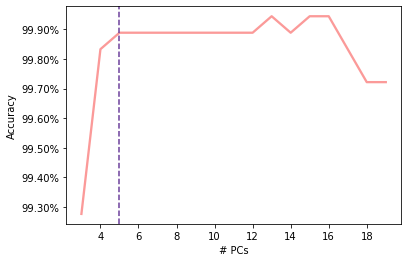

In [ ]:
#Plot the accuracy of the svm for each number of principal components
from matplotlib.colors import ListedColormap
import matplotlib.ticker as mtick
my_cmap = ListedColormap(sns.color_palette('Paired'))

plt.plot(pi[1:],np.array(np.array(acc)*100)[1:],c=my_cmap.colors[4],linewidth=2.3)
ax=plt.gca()
#plt.title('Random Forest with Select K-best')
plt.axvline(x=5,c=my_cmap.colors[9],ls='--')

fmt = '%.2f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
plt.xlabel('# PCs')
plt.ylabel('Accuracy')


plt.show()